<a href="https://colab.research.google.com/github/unmiulast/Tokyo/blob/main/9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#教師なし学習
import numpy as np
import numpy.random as random
import scipy as sp
from pandas import Series, DataFrame
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

import sklearn

%precision 3

'%.3f'

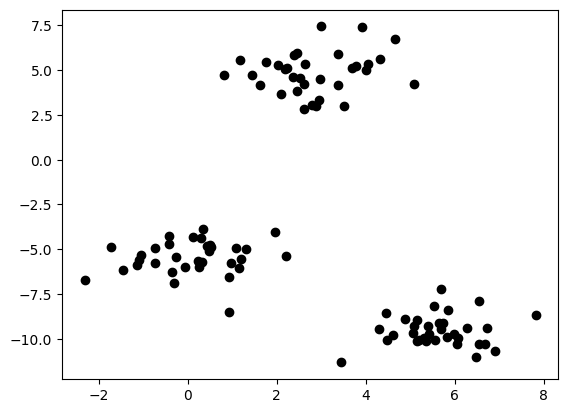

In [2]:
#クラスタリング
#データそのものに着目して隠れた構造やインサイトを見つけ出すためのモデル構築
#k-means法

from sklearn.cluster import KMeans

from sklearn.datasets import make_blobs

#サンプルデータの生成
#make_blobsは値を2つ返すため，一方は使用しない _ で受け取る
X, _ = make_blobs (random_state = 10)

plt.scatter(X[:,0],X[:,1],color ='black')

In [3]:
#KMeansクラスの初期化
kmeans =KMeans(init ='random', n_clusters = 3)

#クラスターの重心を計算
kmeans.fit(X)

#クラスター番号を予測
y_pred = kmeans.predict(X)

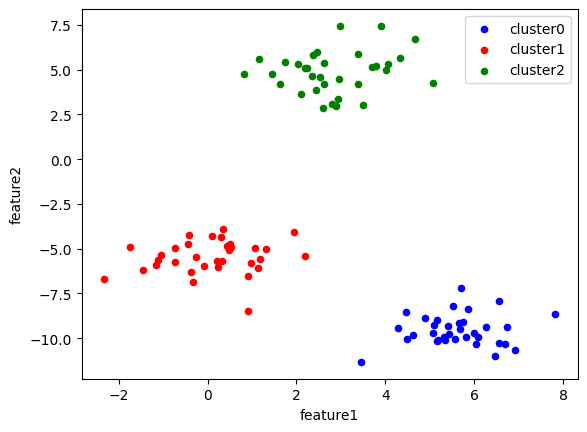

In [4]:
#concatでデータを横に結合(axis = 1 と指定)
merge_data = pd.concat([pd.DataFrame(X[:,0]),pd.DataFrame(X[:,1]),pd.DataFrame(y_pred)], axis = 1)

#上記のデータにて，X軸をfeature1, Y軸をfeature2, クラスター番号をclusterと列名指定
merge_data.columns = ['feature1', 'feature2', 'cluster']

#クラスタリング結果のグラフ化
ax = None
colors = ['blue', 'red', 'green']

for i, data in merge_data.groupby('cluster'):
  ax = data.plot.scatter(x = 'feature1', y = 'feature2', color = colors[i], label = f'cluster{i}', ax = ax)

<Axes: xlabel='feature1', ylabel='feature2'>

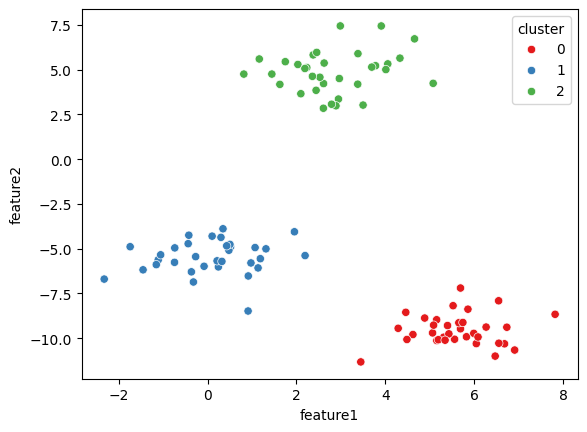

In [5]:
import seaborn as sns

sns.scatterplot(
    data=merge_data,
    x="feature1", y="feature2",
    hue="cluster",palette="Set1"

)


In [6]:
import requests, zipfile
import io

zip_file_url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank.zip'

r = requests.get(zip_file_url, stream = True)
z = zipfile.ZipFile(io.BytesIO(r.content))
z.extractall()

In [7]:
bank = pd.read_csv('bank-full.csv',sep =';')
bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [8]:
bank.isnull().sum()

,0
age,0
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0
contact,0
day,0


In [9]:
from sklearn.preprocessing import StandardScaler

bank_sub = bank[['age','balance','campaign','previous']]

sc = StandardScaler()
sc.fit(bank_sub)
bank_sub_std = sc.transform(bank_sub)
bank_sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   age       45211 non-null  int64
 1   balance   45211 non-null  int64
 2   campaign  45211 non-null  int64
 3   previous  45211 non-null  int64
dtypes: int64(4)
memory usage: 1.4 MB


cluster_number
0    23791
1     1374
2     3781
3     1286
4    14454
5      525
Name: count, dtype: int64


Text(0, 0.5, 'count')

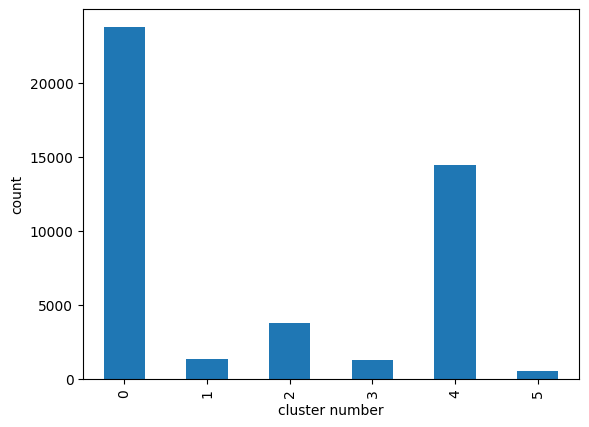

In [10]:
kmeans = KMeans(init ='random', n_clusters = 6, random_state = 0)

kmeans.fit(bank_sub_std)

#クラスター番号をpandasのSeriesオブジェクトに変換
labels = pd.Series(kmeans.labels_, name ='cluster_number')

print(labels.value_counts().sort_index())

ax = labels.value_counts().sort_index().plot(kind ='bar')
ax.set_xlabel('cluster number')
ax.set_ylabel('count')

Text(0, 0.5, 'Distortion')

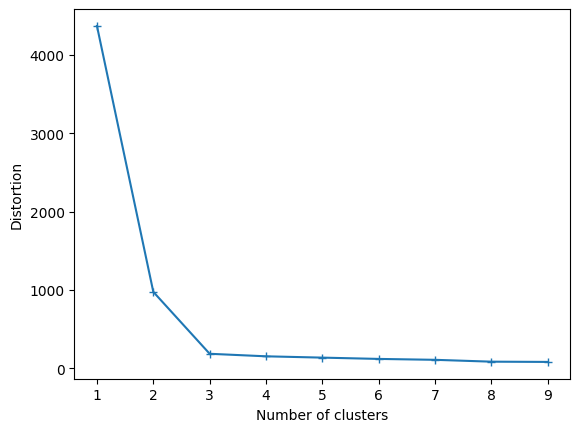

In [11]:
#エルボー法による推定
dist_list = []

for i in range(1,10):
  kmeans = KMeans(n_clusters = i, init = 'random', random_state = 0)
  kmeans.fit(X)
  dist_list.append(kmeans.inertia_)

plt.plot(range(1,10), dist_list, marker = '+')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')

Text(0, 0.5, 'Distortion')

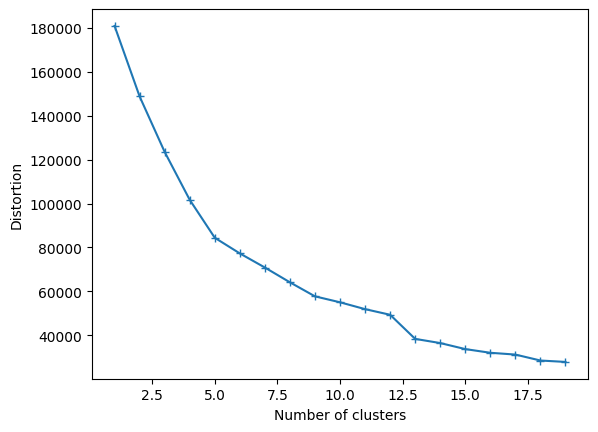

In [12]:
dist_list = []
for i in range(1,20):
  kmeans = KMeans(n_clusters = i, init = 'random', random_state = 0)
  kmeans.fit(bank_sub_std)
  dist_list.append(kmeans.inertia_)

plt.plot(range(1,20), dist_list, marker = '+')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')

In [13]:
#金融機関のデータにクラスター番号のデータを結合
bank_with_cluster = pd.concat([bank, labels], axis = 1)

bank_with_cluster

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,cluster_number
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,4
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,4
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,4
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes,4
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes,4
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes,4
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no,4


In [14]:
bins =[15,20,25,30,35,40,45,50,55,60,65,100]

#上の区切りをもとにデータを分割し，qcut_age変数に各データの年齢層を設定
qcut_age = pd.cut(bank_with_cluster.age, bins, right = False)

#クラスタ番号と年齢層を結合
df = pd.concat([bank_with_cluster.cluster_number, qcut_age], axis = 1)

#クラスタ番号と年齢層を軸に集計し，年齢層を列に設定
cross_cluster_age = df.groupby(['cluster_number','age']).size().unstack().fillna(0)
cross_cluster_age

/tmp/ipython-input-2648037877.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cross_cluster_age = df.groupby(['cluster_number','age']).size().unstack().fillna(0)


age,"[15, 20)","[20, 25)","[25, 30)","[30, 35)","[35, 40)","[40, 45)","[45, 50)","[50, 55)","[55, 60)","[60, 65)","[65, 100)"
cluster_number,,,,,,,,,,,
0,45,708,3972,8272,6853,3941,0,0,0,0,0
1,0,20,130,327,306,186,145,117,71,38,34
2,1,18,233,782,872,739,587,337,175,32,5
3,0,11,74,240,219,205,156,141,156,48,36
4,0,0,0,0,0,1022,4529,3840,3479,850,734
5,1,5,55,119,99,92,53,53,41,6,1


In [15]:
hist_age = qcut_age.value_counts()

hist_age

,count
age,
"[30, 35)",9740
"[35, 40)",8349
"[40, 45)",6185
"[45, 50)",5470
"[50, 55)",4488
"[25, 30)",4464
"[55, 60)",3922
"[60, 65)",974
"[65, 100)",810


<Axes: xlabel='age', ylabel='cluster_number'>

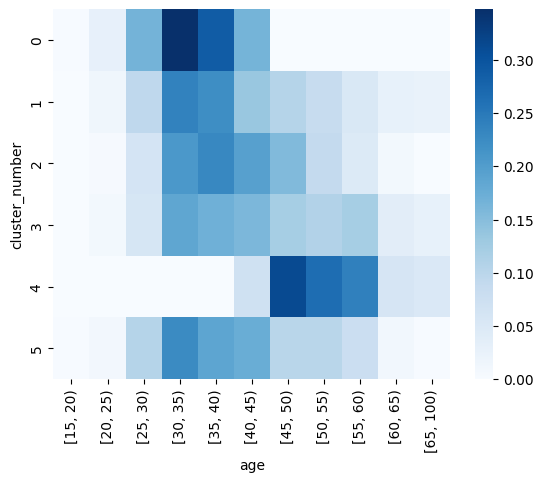

In [16]:
sns.heatmap(cross_cluster_age.apply(lambda x: x/x.sum(), axis = 1), cmap = 'Blues')

In [17]:
cross_cluster_job = bank_with_cluster.groupby(['cluster_number','job']).size().unstack().fillna(0)
cross_cluster_job

job,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown
cluster_number,,,,,,,,,,,,
0,3022,5426,702,413,4980,55,826,2496,814,4290,690,77
1,193,239,42,21,335,53,42,113,53,245,33,5
2,387,845,146,108,863,60,144,358,40,704,90,36
3,109,176,54,36,418,77,71,69,22,194,49,11
4,1414,2915,530,655,2733,2008,477,1077,3,2054,434,154
5,46,131,13,7,129,11,19,41,6,110,7,5


<Axes: xlabel='job', ylabel='cluster_number'>

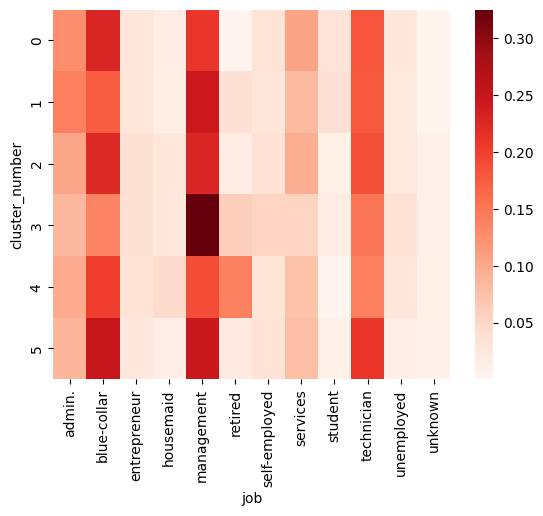

In [18]:
sns.heatmap(cross_cluster_job.apply(lambda x: x/x.sum(), axis = 1),cmap ='Reds')

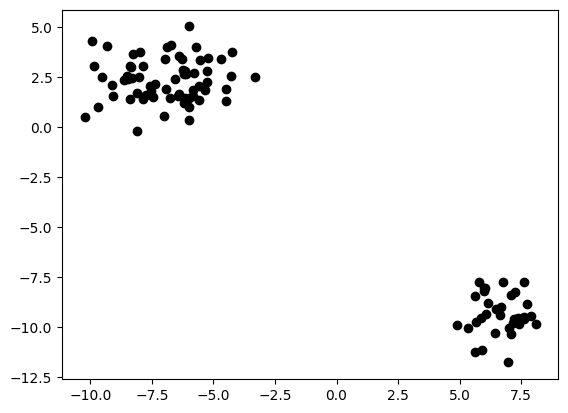

In [19]:
from sklearn.cluster import KMeans

from sklearn.datasets import make_blobs

#サンプルデータの生成
#make_blobsは値を2つ返すため，一方は使用しない _ で受け取る
X, _ = make_blobs (random_state = 52)

plt.scatter(X[:,0],X[:,1],color ='black')

In [20]:
#KMeansクラスの初期化
kmeans =KMeans(init ='random', n_clusters = 2)

#クラスターの重心を計算
kmeans.fit(X)

#クラスター番号を予測
y_pred = kmeans.predict(X)

<Axes: xlabel='feature1', ylabel='feature2'>

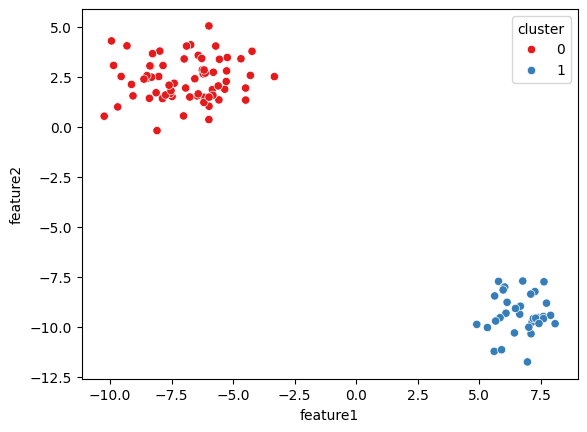

In [21]:
#concatでデータを横に結合(axis = 1 と指定)
merge_data = pd.concat([pd.DataFrame(X[:,0]),pd.DataFrame(X[:,1]),pd.DataFrame(y_pred)], axis = 1)

#上記のデータにて，X軸をfeature1, Y軸をfeature2, クラスター番号をclusterと列名指定
merge_data.columns = ['feature1', 'feature2', 'cluster']

sns.scatterplot(
    data=merge_data,
    x="feature1", y="feature2",
    hue="cluster",palette="Set1"

)

相関係数0.889:


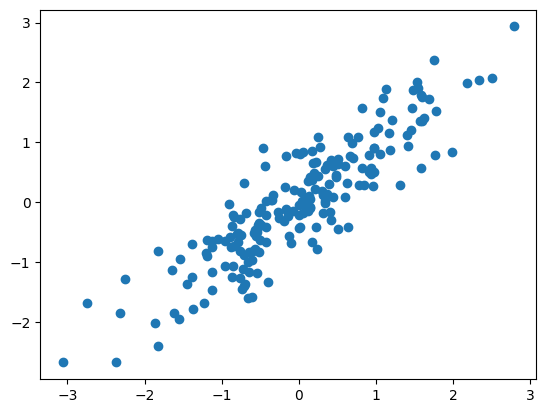

In [22]:
#主成分分析(PCA)
#もとデータの持つ情報をできるだけ失わずに変数の数を圧縮できる

from sklearn.preprocessing import StandardScaler

sample = np.random.RandomState(1)

#2つの乱数を生成
X = np.dot(sample.rand(2,2), sample.randn(2,200)).T

#標準化(平均が0，分散が1)
sc = StandardScaler()
X_std = sc.fit_transform(X)

#相関係数の算出とグラフ化
print('相関係数{:.3f}:'.format(sp.stats.pearsonr(X_std[:,0],X_std[:,1])[0]))
#X_std[:,0] … 1列目（横軸）全行の 0列目（1列目のデータ） を取り出す
#X_std[:,1] … 2列目（縦軸）全行の 1列目（2列目のデータ） を取り出す
plt.scatter(X_std[:,0],X_std[:,1])

In [23]:
from sklearn.decomposition import PCA

#主成分分析
#抽出したい主成分の数n_components
pca = PCA(n_components = 2)
pca.fit(X_std)

PCA(n_components=2)

In [24]:
#components_属性(固有ベクトル)
print(pca.components_)

[[ 0.707  0.707]
 [ 0.707 -0.707]]


In [25]:
#explained_variance_属性(各主成分の分散)
#元々の分散の総和と主成分の分散の総和は一致する
print('各主成分の分散:{}'.format(pca.explained_variance_))

各主成分の分散:[1.899 0.111]


In [26]:
#explained_variance_ratio_属性(各主成分が持つ分散の比率)
print('各主成分の分散割合:{}'.format(pca.explained_variance_ratio_))


各主成分の分散割合:[0.945 0.055]


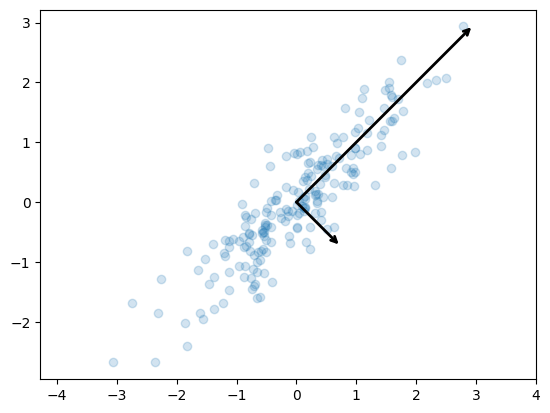

In [27]:
arrowprops = dict(arrowstyle = '->',
                  linewidth = 2,
                  shrinkA = 0,
                  shrinkB = 0)

def draw_vector(v0,v1):
  plt.gca().annotate('', v1, v0, arrowprops = arrowprops)

plt.scatter(X_std[:,0], X_std[:,1], alpha =0.2)

for length, vector in zip(pca.explained_variance_, pca.components_):
  v = vector * 3 * np.sqrt(length)
  draw_vector(pca.mean_, pca.mean_ + v)

plt.axis('equal');

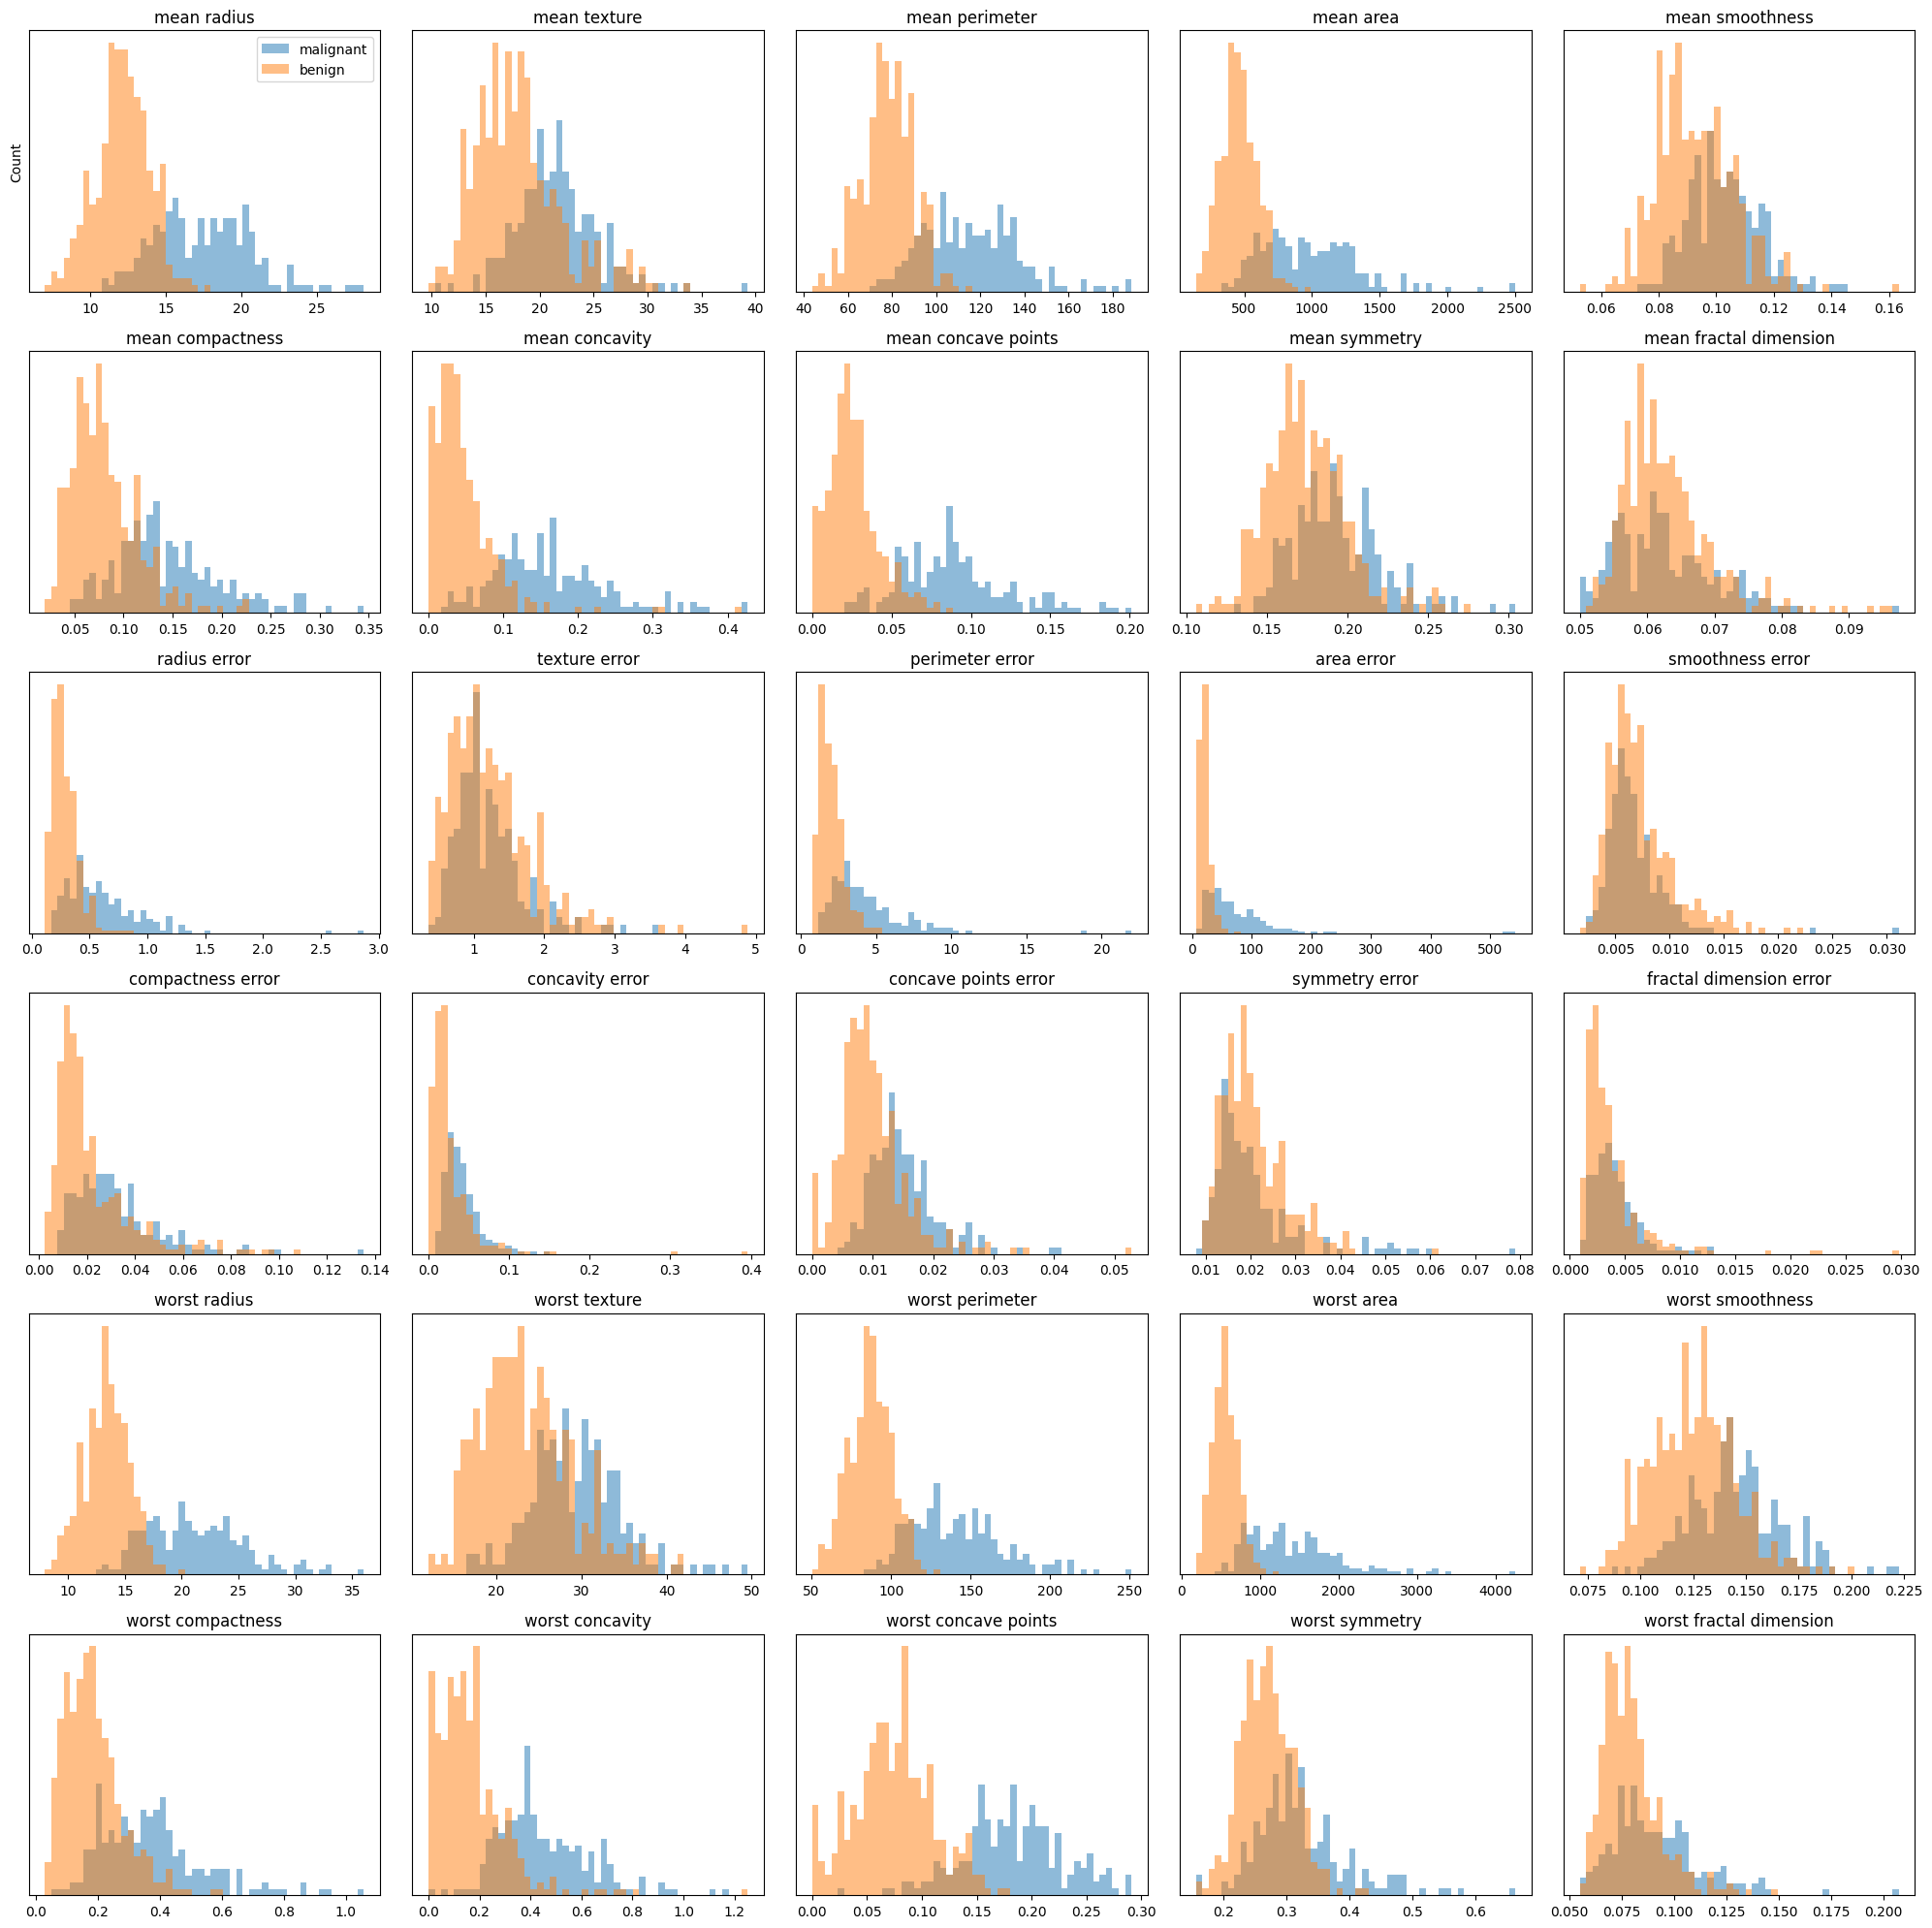

In [28]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

#データをmalignant(悪性)かbenign(良性)に分けるためのフィルター処理
#malignantはcancer.targetが0
malignant = cancer.data[cancer.target == 0]

benign = cancer.data[cancer.target == 1]

#malignantがブルー，benignがオレンジのヒストグラム
#各説明変数と目的関数の関係を示したヒストグラム
fig, axes = plt.subplots(6,5, figsize = (20,20))
ax = axes.ravel()

for i in range(30):
  _,bins = np.histogram(cancer.data[:,i], bins = 50)
  ax[i].hist(malignant[:,i], bins, alpha = 0.5)
  ax[i].hist(benign[:,i], bins,alpha = .5)
  ax[i].set_title(cancer.feature_names[i])
  ax[i].set_yticks(())

ax[0].set_ylabel('Count')
ax[0].legend(['malignant', 'benign'],loc = 'best')
fig.tight_layout()

In [29]:
#主成分分析を用いて変数を削減

sc = StandardScaler()
X_std = sc.fit_transform(cancer.data)

pca = PCA(n_components = 2)
pca.fit(X_std)
X_pca = pca.transform(X_std)

print('X_pca shape: {}'.format(X_pca.shape))
print('Explained variance ratio: {}'.format(pca.explained_variance_ratio_))

X_pca shape: (569, 2)
Explained variance ratio: [0.443 0.19 ]


0.443 + 0.19 = 63.3%が2つの主成分に凝縮されている

In [30]:
#列にラベルをつける
X_pca = pd.DataFrame(X_pca, columns = ['pc1','pc2'])

#上のデータに目的変数を紐づけ，横に結合
X_pca = pd.concat([X_pca, pd.DataFrame(cancer.target, columns = ['target'])],axis = 1)

#良性と悪性を分ける
pca_malignant = X_pca[X_pca['target'] == 0]
pca_benign = X_pca[X_pca['target'] == 1]

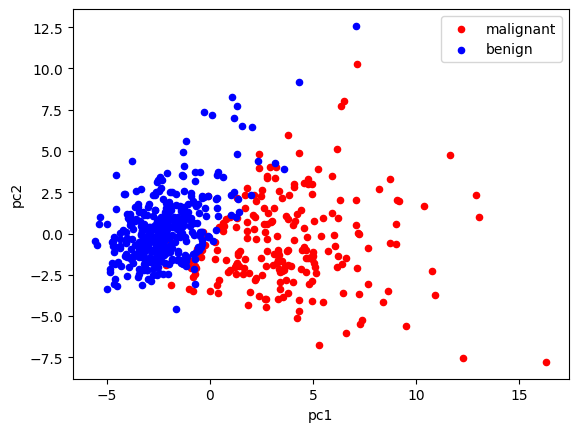

In [31]:
ax = pca_malignant.plot.scatter(x = 'pc1', y = 'pc2', color = 'red', label = 'malignant');

pca_benign.plot.scatter(x = 'pc1', y = 'pc2', color = 'blue', label = 'benign', ax = ax);

In [32]:
from sklearn.datasets import load_iris

iris = load_iris()

sc = StandardScaler()
X_std = sc.fit_transform(iris.data)

pca = PCA(n_components = 2)
pca.fit(X_std)
X_pca = pca.transform(X_std)

print('X_pca shape: {}'.format(X_pca.shape))
print('Explained variance ratio: {}'.format(pca.explained_variance_ratio_))

X_pca shape: (150, 2)
Explained variance ratio: [0.73  0.229]


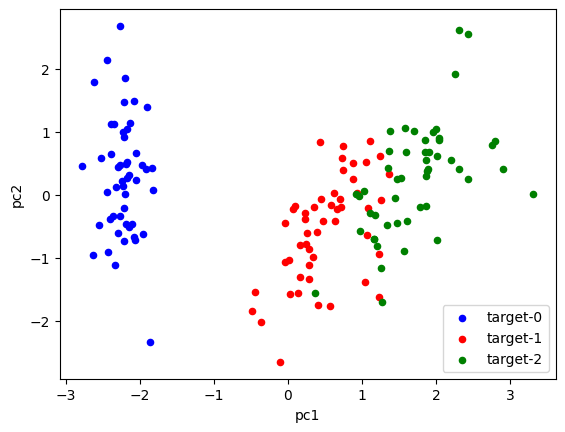

In [33]:
X_pca = pd.DataFrame(X_pca, columns = ['pc1', 'pc2'])

X_pca = pd.concat([X_pca, pd.DataFrame(iris.target, columns = ['target'])],axis = 1)

pca_0 = X_pca[X_pca['target'] == 0]
pca_1 = X_pca[X_pca['target'] == 1]
pca_2 = X_pca[X_pca['target'] == 2]

ax = None
colors =['blue', 'red', 'green']

for i, data in X_pca.groupby('target'):
  ax = data.plot.scatter(
      x ='pc1', y = 'pc2',
      color = colors[i], label = f'target-{i}', ax = ax
  )

In [34]:
trans = pd.read_excel('/content/Online Retail (1).xlsx')
trans

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [35]:
trans['cancel_flg'] = trans.InvoiceNo.map(lambda x: str(x)[0])

trans.groupby('cancel_flg').size()

,0
cancel_flg,
5,532618
A,3
C,9288


In [36]:
#キャンセルと欠損をフィルターにかける
trans = trans[(trans.cancel_flg == '5') & (trans.CustomerID.notnull())]
trans

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,cancel_flg
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,5
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,5
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,5
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,5
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,5
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,5
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,5
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,5
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,5


In [37]:
#アソシエーションルール
trans['StockCode'].value_counts().head(5)

,count
StockCode,
85123A,2035
22423,1724
85099B,1618
84879,1408
47566,1397


In [38]:
#支持度support(ある商品と別の商品が併売されたバスケットの数，または全体に占める割合)

#すべてのInvoiceNoをtrans_allとして抽出(集合型にすることで，重複のない状態)
trans_all = set(trans.InvoiceNo)

#85123Aを買ったデータをtrans_aとする
trans_a = set(trans[trans['StockCode'] == '85123A'].InvoiceNo)
print(len(trans_a))

#85099Bを買ったデータをtrans_bとする
trans_b = set(trans[trans['StockCode'] == '85099B'].InvoiceNo)
print(len(trans_b))

#両方買ったデータをtrans_abとする
trans_ab = trans_a & trans_b
print(len(trans_ab))

1978
1600
252


In [39]:
print('両商品を含むバスケットの数:{}'.format(len(trans_ab)))
print('両商品を含むバスケット全体に占める割合:{:.3f}'.format(len(trans_ab)/len(trans_all)))

両商品を含むバスケットの数:252
両商品を含むバスケット全体に占める割合:0.014


In [40]:
#85123Aの支持度
print('85123Aのバスケットの数:{}'.format(len(trans_a)))
print('85123Aを含むバスケットの全体に占める割合:{:.3f}'.format(len(trans_a)/len(trans_all)))

85123Aのバスケットの数:1978
85123Aを含むバスケットの全体に占める割合:0.107


In [41]:
#確信度confidence(商品AをベースにAとBの組み合わせ購買がどれくらいの割合であるのか)

print('確信度:{:.3f}'.format(len(trans_ab)/len(trans_a)))

確信度:0.127


In [42]:
print('確信度:{:.3f}'.format(len(trans_ab) / len(trans_b)))

確信度:0.158


In [43]:
#リフト値lift(ルールの確信度をBの支持度で割った値)
#全体のバスケットに占める商品Bの購買率に対する，商品Aを購買したときのBの購買率の比率

#全体のバスケットに占める商品Bの購買率
support_b = len(trans_b) / len(trans_all)

#全体のバスケットに占める商品Bの購買率
confidence = len(trans_ab) / len(trans_a)

#リフト値
lift = confidence / support_b
print('lift:{:.3f}'.format(lift))

lift:1.476


確信度が高くてもリフト値が1.0を下回るときは注意

In [45]:
#レコード数が1,000より多い商品（StockCode）を対象にの商品とどの商品の組み合わせの支持度が一番高いですか？

import itertools

#レコードが1000より大きいStockCodeの抽出
indexer = trans.StockCode.value_counts() > 1000
Items = trans.StockCode.value_counts()[indexer.index[indexer]].index
Items

Index(['85123A',    22423, '85099B',    84879,    47566,    20725,    22720,
          20727,   'POST',    23203,    22383,    22197,    21212,    23209,
          23298,    22086,    22382],
      dtype='object', name='StockCode')

In [46]:
#Itemsに含まれるStockCodeの任意の2つの組み合わせごとに支持度を計算
results ={}
for element in itertools.combinations(Items,2):
  trans_0 = set(trans[trans['StockCode'] == element[0]].InvoiceNo)
  trans_1 = set(trans[trans['StockCode'] == element[1]].InvoiceNo)
  trans_both = trans_0 & trans_1
  support = len(trans_both) / len(trans_all)
  results[element] = support

maxKey = max([(v,k) for k,v in results.items()])[1]
print('支持度最大の組み合わせ:{}'.format(maxKey))
print('支持度の最大値:{:.4f}'.format(results[maxKey]))

支持度最大の組み合わせ:(20725, 22383)
支持度の最大値:0.0280
